In [1]:
!nvidia-smi

Sun Oct 12 23:32:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.163.01             Driver Version: 550.163.01     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P3            588W /   55W |       9MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import torch
from torch import nn # All the building blocks for neural networks
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

print(torch.__version__)

2.5.1


/home/hamid/miniconda3/envs/dl_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Setup device-agnostic code (running the code on any available accelerator):

PyTorch is capable of running on both GPU or CPU

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.cuda.device_count()
device

/home/hamid/miniconda3/envs/dl_env/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647352509/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


'cpu'

### Scalar & Vector

In [50]:
scalar = torch.tensor(5)
scalar

tensor(5)

In [51]:
scalar.ndim

0

In [52]:
vector = torch.tensor([1,3])
vector

tensor([1, 3])

In [53]:
vector.ndim

1

In [54]:
vector.shape

torch.Size([2])

### Matrix

In [55]:
MAT = torch.tensor([[1, 2],[3, 3], [3,4]])
MAT.ndim
MAT.shape

torch.Size([3, 2])

### Tensor

In [56]:
TEN = torch.tensor([[[1,2,3],
                     [2,3,3],
                     [1,1,1],
                     [10,10,10]],
                    [[2,2,2],
                     [1,1,1],
                     [10.,11,11],
                     [13,13,13]]])
TEN.ndim
TEN.size
TEN.shape
TEN.dim
TEN.dtype

torch.float32

### Random Tensor

In [57]:
random_ten = torch.rand(size=(4,2,3,1))
print(random_ten)
random_ten.ndim, random_ten.shape

tensor([[[[0.3904],
          [0.6009],
          [0.2566]],

         [[0.7936],
          [0.9408],
          [0.1332]]],


        [[[0.9346],
          [0.5936],
          [0.8694]],

         [[0.5677],
          [0.7411],
          [0.4294]]],


        [[[0.8854],
          [0.5739],
          [0.2666]],

         [[0.6274],
          [0.2696],
          [0.4414]]],


        [[[0.2969],
          [0.8317],
          [0.1053]],

         [[0.2695],
          [0.3588],
          [0.1994]]]])


(4, torch.Size([4, 2, 3, 1]))

In [58]:
zero_ten = torch.ones((2,3,10))
print(zero_ten)

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])


### arange

In [59]:
torch.tensor([200, 200, 400], dtype=torch.long, device="cuda")

tensor([200, 200, 400], device='cuda:0')

In [60]:
print(torch.arange(0,10))
print(torch.arange(0,10,2))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 2, 4, 6, 8])


In [61]:
torch.tensor([200,200,400],dtype=int,device="cpu")
torch.tensor([200,200,400],dtype=int,device="cuda")

tensor([200, 200, 400], device='cuda:0')

In [62]:
int_32_tensor = torch.tensor([1,2,3,4,5], device='cpu' ,dtype=torch.int32)
float_16_tensor = torch.tensor([3,1,2,3,3], dtype=torch.float16)

(int_32_tensor * float_16_tensor).device

device(type='cpu')

### Tensor Manipulation

In [63]:
vec_tensor = torch.tensor([[1,2.3,2.1,3,10,0,1001,-2]], dtype=torch.int16, device="cpu")
mat_tensor_1 = torch.tensor([[1,2.3,2.34444], [22,1,300]], dtype=torch.float, device="cpu")
mat_tensor_2 = torch.tensor([[1,2,3], [1,1,3]], dtype=torch.float, device="cpu")

print(mat_tensor_1.T)
print(f"original tensor: \n{mat_tensor_1}\n")
print(f"addition: \n{mat_tensor_1 + 10.2}\n")
print(f"element-wise multiplication: \n{mat_tensor_1 * 2}\n")
print(f"matrix multiplication (dot product): \n{mat_tensor_1*mat_tensor_2}\n")
print(f"matrix multiplication (dot product): \n{torch.matmul(mat_tensor_1,mat_tensor_1.T)}\n")
print(f"matrix multiplication (dot product): \n{torch.mm(mat_tensor_1,mat_tensor_1.T)}\n")


tensor([[  1.0000,  22.0000],
        [  2.3000,   1.0000],
        [  2.3444, 300.0000]])
original tensor: 
tensor([[  1.0000,   2.3000,   2.3444],
        [ 22.0000,   1.0000, 300.0000]])

addition: 
tensor([[ 11.2000,  12.5000,  12.5444],
        [ 32.2000,  11.2000, 310.2000]])

element-wise multiplication: 
tensor([[  2.0000,   4.6000,   4.6889],
        [ 44.0000,   2.0000, 600.0000]])

matrix multiplication (dot product): 
tensor([[  1.0000,   4.6000,   7.0333],
        [ 22.0000,   1.0000, 900.0000]])

matrix multiplication (dot product): 
tensor([[1.1786e+01, 7.2763e+02],
        [7.2763e+02, 9.0485e+04]])

matrix multiplication (dot product): 
tensor([[1.1786e+01, 7.2763e+02],
        [7.2763e+02, 9.0485e+04]])



### Tensor Aggregation (min, max, mean, sum and ...)

In [64]:
mat_tensor_1.dtype
print(f"some_tensor_1: \n{mat_tensor_1}\n")
print(f"MIN: {mat_tensor_1.min()}\n")
print(f"MAX: {mat_tensor_1.max()}\n")
print(f"MEAN: {mat_tensor_1.mean()}\n")
print(f"ARGMIN: {mat_tensor_1.argmin()}\n")  # positional min
print(f"ARGMAX: {mat_tensor_1.argmax()}\n")  # positional max
mat_tensor_1[1,2]

some_tensor_1: 
tensor([[  1.0000,   2.3000,   2.3444],
        [ 22.0000,   1.0000, 300.0000]])

MIN: 1.0

MAX: 300.0

MEAN: 54.77407455444336

ARGMIN: 0

ARGMAX: 5



tensor(300.)

### Reshaping, Stacking, Squeezing, Unsqueesing tensors:

In [65]:
print(f"vector: {vec_tensor}", vec_tensor.shape,"\n")
reshaped_vec_tensor = vec_tensor.reshape(2,4)
print(f"Reshaped vec_tensor: \n{reshaped_vec_tensor}", reshaped_vec_tensor.shape, "\n")

reshaped_vec_tensor.view(4,2)  # view shares the same memory as reshaped_vec_tensor, lets say it is just a differet view of reshaped_vec_tensor.
stacked_vec_tensor = torch.stack([vec_tensor, vec_tensor, vec_tensor], dim=0)  # vertical
print(f"stacked vec_tensor: \n{stacked_vec_tensor}", stacked_vec_tensor.shape, "\n")

stacked_vec_tensor = torch.stack([vec_tensor, vec_tensor, vec_tensor], dim=1)  # horizontal
print(f"stacked vec_tensor: \n{stacked_vec_tensor}", stacked_vec_tensor.shape, "\n")

squeezed_vec_tensor = vec_tensor.squeeze()  # removes all single dimensions from the target tensor
print(f"squeezed vec_tensor: \n{squeezed_vec_tensor}", squeezed_vec_tensor.shape, "\n")

unsqueezed_vec_tensor = squeezed_vec_tensor.unsqueeze(dim=0)  # adds a single dimension to the target tensor at a specific dim
print(f"unsqueezed vec_tensor: \n{unsqueezed_vec_tensor}", unsqueezed_vec_tensor.shape, "\n")

permuted_vec_tensor = reshaped_vec_tensor.permute(1,0)  # rearranges/swap the dimensions of a target tensor in a specified order (share same memory): second dim first, first dim come to second
print(f"permuted vec_tensor: \n{permuted_vec_tensor}", permuted_vec_tensor.shape, "\n")

vector: tensor([[   1,    2,    2,    3,   10,    0, 1001,   -2]], dtype=torch.int16) torch.Size([1, 8]) 

Reshaped vec_tensor: 
tensor([[   1,    2,    2,    3],
        [  10,    0, 1001,   -2]], dtype=torch.int16) torch.Size([2, 4]) 

stacked vec_tensor: 
tensor([[[   1,    2,    2,    3,   10,    0, 1001,   -2]],

        [[   1,    2,    2,    3,   10,    0, 1001,   -2]],

        [[   1,    2,    2,    3,   10,    0, 1001,   -2]]], dtype=torch.int16) torch.Size([3, 1, 8]) 

stacked vec_tensor: 
tensor([[[   1,    2,    2,    3,   10,    0, 1001,   -2],
         [   1,    2,    2,    3,   10,    0, 1001,   -2],
         [   1,    2,    2,    3,   10,    0, 1001,   -2]]], dtype=torch.int16) torch.Size([1, 3, 8]) 

squeezed vec_tensor: 
tensor([   1,    2,    2,    3,   10,    0, 1001,   -2], dtype=torch.int16) torch.Size([8]) 

unsqueezed vec_tensor: 
tensor([[   1,    2,    2,    3,   10,    0, 1001,   -2]], dtype=torch.int16) torch.Size([1, 8]) 

permuted vec_tensor: 
tensor([[  

### Indexing (similar to Numpy)

In [66]:
mat_tensor_3 = torch.arange(10,19).reshape(1,3,3)
print(f"mat_tensor_3: \n{mat_tensor_3}", mat_tensor_3.shape)
print(mat_tensor_3[0,2,2])
print(mat_tensor_3[0,:,2])
print(mat_tensor_3[0,2,:])
print(mat_tensor_3[0][2])

mat_tensor_3: 
tensor([[[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]]]) torch.Size([1, 3, 3])
tensor(18)
tensor([12, 15, 18])
tensor([16, 17, 18])
tensor([16, 17, 18])


### Pytorch Tensors and Numpy

In [67]:
np_array = np.arange(1,10)
torch_vec = torch.arange(1,10)
print(np_array, "\n", torch_vec)

print()
print(torch.from_numpy(np_array))  # convert numpy to tensor
print(torch_vec.numpy())  # convert tensor to numpy

[1 2 3 4 5 6 7 8 9] 
 tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
[1 2 3 4 5 6 7 8 9]


### Reproducibility; taking out of random
In short, how a Neural Network(NN) learns:

`Start with a random number` -> `tensor operations` -> `update random numbers trying to make them 
a better representation of the data` -> `again` -> `again` -> ...

To reduce randomness in NN, PyTorch introduced a concept called **random seed** which `flavors` the randomness. (makes the randomness reproducible)

In [68]:
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
rand_tensor_A = torch.rand(1,2,4)
torch.manual_seed(RANDOM_SEED)
rand_tensor_B = torch.rand(1,2,4)
print(f"rand_tensor_A: \n{rand_tensor_A}\n")
print(f"rand_tensor_A: \n{rand_tensor_B}\n")

print(rand_tensor_A == rand_tensor_B)

rand_tensor_A: 
tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936]]])

rand_tensor_A: 
tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936]]])

tensor([[[True, True, True, True],
         [True, True, True, True]]])


In [69]:
torch.cuda.is_available()
torch.cuda.device_count()

1

## PyTorch Workflow

Using linear regression formula to make a straight line with known parameters.

In [70]:
weight = 0.7
bias = 0.3

start  = 0
end = 1 
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)  # feature (input)
y = weight * x + bias  # label (ouputs)

x[:10], y[:10]  

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#### Splitting data into training and test sets

In [71]:
len(x), len(y)

(50, 50)

### Generating some data (training and testing)

In [72]:
train_set = int(0.8 * len(x))
x_train, y_train = x[:train_set], y[:train_set]
x_test, y_test = x[train_set:], y[train_set:]

len(x_train), len(y_train), len(x_test), len(y_test)    

(40, 40, 10, 10)

### Visualize, visualize, visualize

In [73]:
def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = "b", s = 4, label="Training data")
    plt.scatter(test_data, test_labels, c = "g", s = 4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", s = 4, label="Predictions")
    
    plt.legend(prop={"size":14})

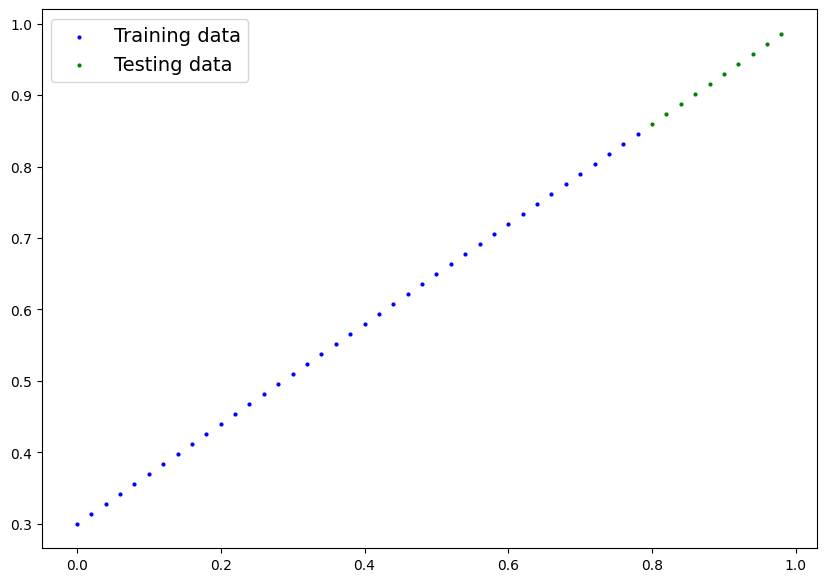

In [74]:
plot_predictions()

# Building our first PyTorch __model__

Creating a linear regression model class: 

#1: Linear regression model with nn.Parameters

#2: Linear regression model with nn.Linear 

In [75]:
# 1
class LinearRegresssionModel(nn.Module):  # nn.Module is the base class for all neural network modules in PyTorch (containts all the build blocks for NN)
    def __init__(self):  # constructor
        super().__init__()
        # Our model starts with random weights and bias:
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        
    # Forward method to define the computation in the model (basically the model itself).
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # x is input
        return self.weights * x + self.bias  # Linear regression equation

In [76]:
# 2
class LinearRegresssionModel_v2(nn.Module):  # nn.Module is the base class for all neural network modules in PyTorch (containts all the build blocks for NN)
    def __init__(self):  # constructor
        super().__init__()
        # Our model starts with a linear layer:
        self.linear_layer = nn.Linear(in_features=1, out_features=1)  # nn.Linear (common pre-defined/pre-built layer) with input and output of size 1, a built-in layer that applies a linear transformation to the incoming data: y = xA^T + b   
        
    # Forward method to define the computation in the model.
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # x is input
        return self.linear_layer(x)  # Linear regression equation   

### PyTorch model building essentials:

* __torch.nn__ -> Contains all of the buildings for computatinal graphs (NN)
* __torch.nn.Parameter__ -> What parameters should our model try and learn
* __torch.nn.Module__ -> The base class for all NN modules, if you subclass it you should overwrite forward()
* __torch.optim__ -> this where the optimizer in PyTorch live, they will help with gradient descent
* __def forward()__ -> All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

### Checking the contents of our PyTorch model:

Using `.parameters()`

In [77]:
torch.manual_seed(42)  # set the random seed for reproducibility
model_0 = LinearRegresssionModel()
list(model_0.parameters())  # Check out the parameters in our model

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [78]:
model_0.state_dict()  # list named parameters with their values

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [79]:
torch.manual_seed(42)  # set the random seed for reproducibility
model_1 = LinearRegresssionModel_v2()
model_1, model_1.state_dict()  # list named parameters with their values

(LinearRegresssionModel_v2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

### Making predictions using `torch.inference_mode()` (Validation / Test)

How well the model predicts `y_test` from `x_test`

In [80]:
# Make predictions with model (good practice to make predictions under inference mode):
with torch.inference_mode():  # No graph building (NN), no gradient tracking, no .backward(), intended for inference only.
    untrained_y_pred = model_0(x_test)  # forward pass

untrained_y_pred

# with torch.no_grad():  # another way to turn off gradients, however inference_mode is prefered (faster)
#     y_pred = model_0(x_test)
#     print("no grad:")
#     print(y_pred)



tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

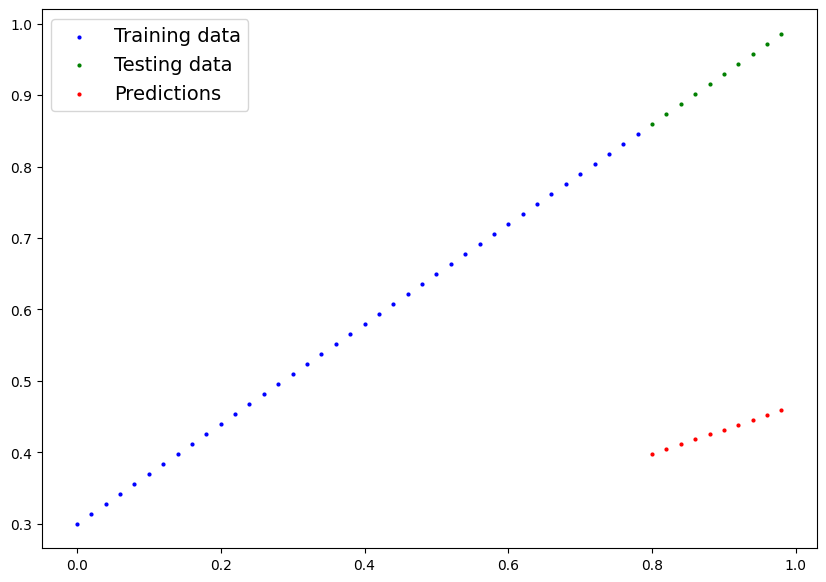

In [81]:
plot_predictions(predictions=untrained_y_pred)

The whole idea of trainig is for a model to move from some uknown parameters (most often random) to some known parameters.

#### Solution:

__Loss function__: One way to measure how poor or how wrong our model predicts vs. the ideal outputs, is loss funtion / cost function / criterion

__Optimizer__: Takes into account the loss of a model and adjusts the model's parameters (e.g. weights and bias) to improve the loss function.

* __params__: the model parameters you'd like to optimize, i.e. params=model_0.parameters()
* __lr__ (learning rate): a hyperparameter that defines how big/small the optimizer changes the parameters with each step.

In [82]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Setting up a __Loss Function__ and __Optimizer__:

In [137]:
### Creating instances of loss function and optimizer:

loss_fun = nn.L1Loss()  # mean absolute error (MAE), average over all training data.
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Building a __training__ & __testing__ loop in PyTorch:
1) __Loop__ through the data
2) __Forward pass__ -> data moving through the model (NN)
3) __Loss calculation__ -> Comparing the forward pass to ground truth labels
4) __Optimizer__
5) __Loss backward__ -> backpropagation
6) __Optimizer step__ -> gradient descent

In [114]:
torch.manual_seed(42)

# model_0 = LinearRegresssionModel()  # create a new instance of the model to reset the parameters

epochs = 200  # TODO; Another hyperparameter that is one loop through the data.

# Track different values for tracking model progress:
epoch_count = []
train_loss_values = []
test_loss_values = []

print(f"true weight: {weight}, bias: {bias} \n")
### Training Loop ###
for epoch in range (epochs):
    model_0.train()  # (GOOD PRACTICE) set the model to training mode (model remember the parameters it has), sets all the parameters that require gradients to require gradients
    
    y_pred = model_0(x_train)  # forward pass ("forward propagation")
    train_loss = loss_fun(y_pred, y_train)  # compute the "loss" (predictions vs. labels)
    optimizer.zero_grad()  # zero grad "optimizer" (set the gradients to zero)
    train_loss.backward()  # "backpropagation" (compute the gradients of each parameter with respect to the loss)
    optimizer.step()  # update model parameters (weights) via "gradient descent"

    ### Testing/Evaluating Loop ###
    model_0.eval()  # (GOOD PRACTICE) Turns off different settings in the model which are not needed for evaluation/test(turns off "dropout" and "batch norm" (if any))
    with torch.inference_mode():  # turn off gradient tracking and a couple of more things behind the scens for inference/testing
        test_pred = model_0(x_test) # forward pass: just using the trained model to make predictions
        test_loss = loss_fun(test_pred, y_test)  # compute the loss
        # print(f"Test loss: {test_loss:.5f}")

    # if epoch % 2 == 0:  # print every 2 epochs
    epoch_count.append(epoch)
    train_loss_values.append(train_loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    
    print(f"Epoch: {epoch} | Train loss: {train_loss:.5f} | Weight: {model_0.weights.item():.3f} | Bias: {model_0.bias.item():.3f} | Test loss: {test_loss:.3f}" )

model_0.state_dict()

true weight: 0.7, bias: 0.3 

Epoch: 0 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 1 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 2 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 3 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 4 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 5 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 6 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 7 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 8 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 9 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 10 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 11 | Train loss: 0.00893 | Weight: 0.699 | Bias: 0.309 | Test loss: 0.008
Epoch: 1

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

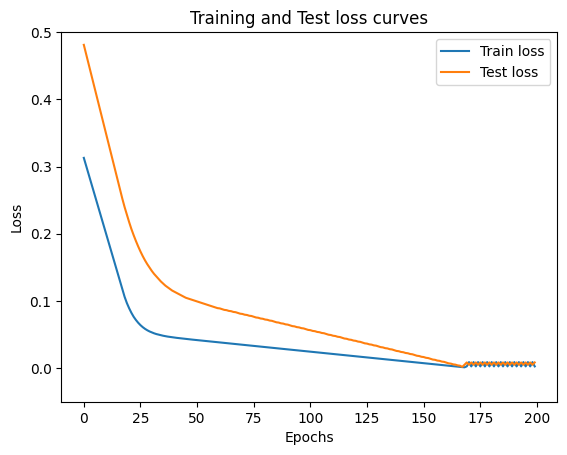

In [85]:
# Plot the loss curves:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.ylim(-.05, .5)
plt.legend()
plt.show()  

In [86]:
with torch.inference_mode():
    test_pred_new = model_0(x_test)

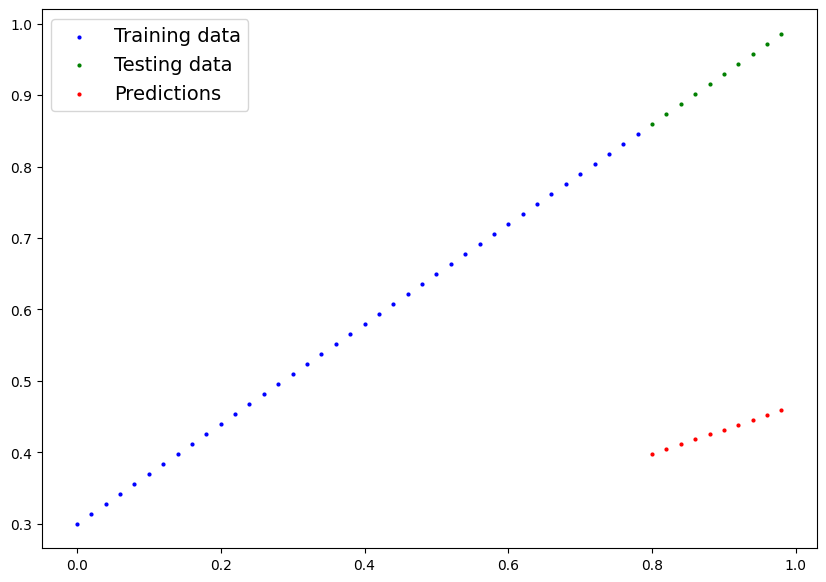

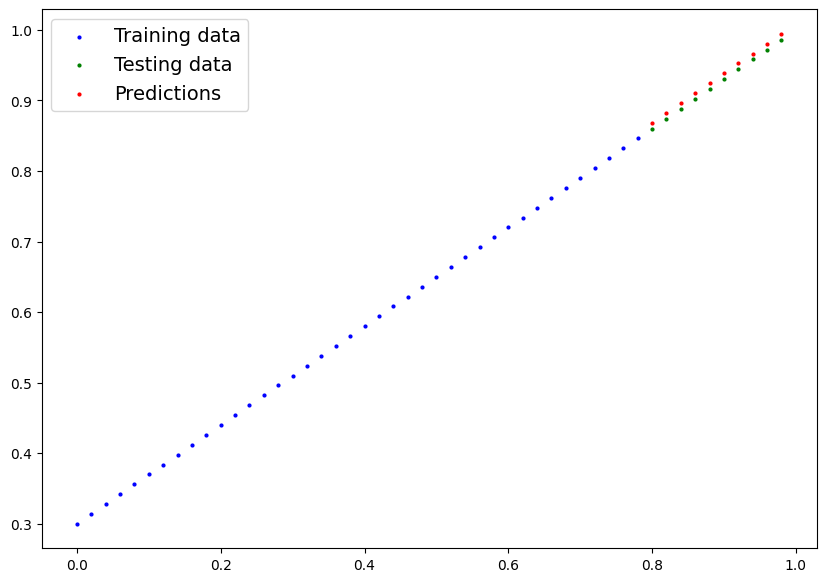

In [87]:
plot_predictions(predictions=untrained_y_pred)
plot_predictions(predictions=test_pred)

# __Saving__ and __Loading__ our model

In [88]:
## Saving our model:
MODEL_NAME = "01_pytorch_workflow_model_0_states.pth"  # TODO
MODEL_PATH = Path("../data/models") 
MODEL_PATH.mkdir(parents=True, exist_ok=True)   
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# torch.save(obj=model_0, f=MODEL_SAVE_PATH)  # save the entire model in Python's pickle format (not recommended way to save a model in PyTorch)    
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)  # save the model state_dict (recommended way to save a model in PyTorch)

In [89]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [90]:
## Loading a saved model:
MODEL_NAME = "01_pytorch_workflow_model_0_states.pth"  # TODO
MODEL_PATH = Path("../data/models") 
MODEL_LOAD_PATH = MODEL_PATH / MODEL_NAME

loaded_model_0 = LinearRegresssionModel()  # create a new instance of the model (same architecture as the saved model)
loaded_model_0.load_state_dict(torch.load(f=MODEL_LOAD_PATH))  # load the saved state_dict into the new instance
 

/tmp/ipykernel_31099/3259065490.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_LOAD_PATH))  # load the saved state_dic

<All keys matched successfully>

In [91]:
## Making predictions with the loaded model:
loaded_model_0.eval()
with torch.inference_mode():
    model_pred = model_0(x_test)
    loaded_model_pred = loaded_model_0(x_test)

model_pred == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
# Check the model device:
next(model_1.parameters()).device

device(type='cpu')

In [96]:
# Set the model to use the traget device (send the model to the GPU memory):
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

# Training:

For training we need:

1) Loss function
2) Optimizer
3) Training loop
4) Testing loop

In [97]:
loss_fn = nn.L1Loss()   
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)  

In [ ]:
torch.manual_seed(42)

pbar = tqdm(range(epochs), desc="Epochs")

epochs = 200  # TODO

# Move data to target device (GPU) for once:
x_train_gpu = x_train.to(device)
y_train_gpu = y_train.to(device)
x_test_gpu  = x_test.to(device)
y_test_gpu  = y_test.to(device)

for epoch in tqdm(range(epochs), desc="Epochs"):
    model_1.train()
    y_pred_gpu = model_1(x_train_gpu)
    train_loss = loss_fn(y_pred_gpu, y_train_gpu)

    optimizer.zero_grad(set_to_none=True)
    train_loss.backward()  # backpropagation
    optimizer.step()  # gradient descent

    # Test loop:
    model_1.eval()
    with torch.inference_mode():
        test_pred_gpu = model_1(x_test_gpu)
        test_loss = loss_fn(test_pred_gpu, y_test_gpu)

    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Train loss: {train_loss:.5f} | Test loss: {test_loss:.3f}" )
    # pbar.set_postfix(train=f"{train_loss.item():.5f}", test=f"{test_loss.item():.5f}")


Epochs:   0%|          | 0/200 [00:21<?, ?it/s, test=0.00033, train=0.01026]


Epoch: 0 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 10 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 20 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 30 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 40 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 50 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 60 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 70 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 80 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 90 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 100 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 110 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 120 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 130 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 140 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 150 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 160 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 170 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 180 | Train loss: 0.00126 | Test loss: 0.014
Epoch: 190 | Train loss

Epochs: 100%|██████████| 200/200 [00:00<00:00, 963.82it/s] 


In [ ]:
# Evaluating the model:
model_1.state_dict() # check the model parameters

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [112]:
weight, bias

(0.7, 0.3)

## **Making** and **evaluating** predictions:

In [115]:
# Turn the model to evaluation mode:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(x_test_gpu)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

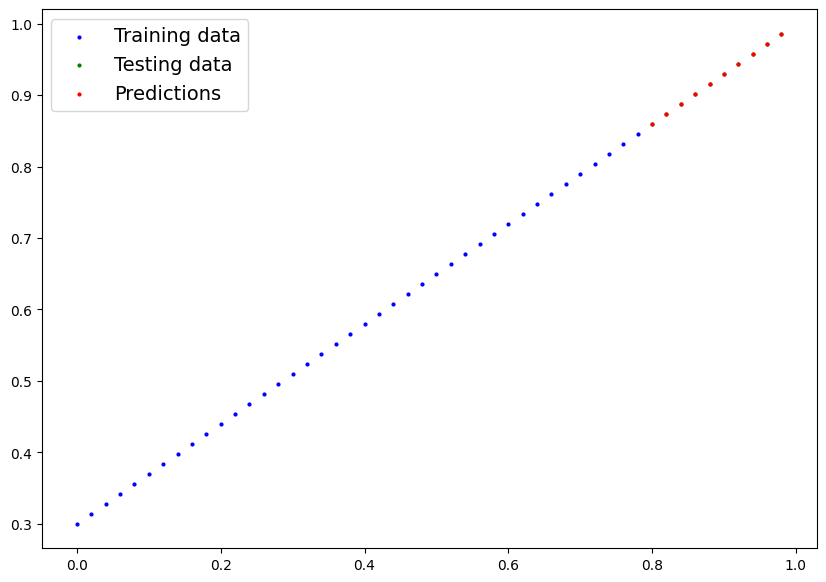

In [ ]:
# Visualizing the model prediction:
# Note: Numpy is a CPU-based library.
plot_predictions(predictions = y_preds.cpu())  # moves a PyTorch tensor to CPU memory and returns that CPU copy.
 

### Saving and loading the trained model:

In [125]:
## Saving our model:
MODEL_NAME = "02_pytorch_workflow_model_1_states.pth"  # TODO
MODEL_PATH = Path("../data/models") 
MODEL_PATH.mkdir(parents=True, exist_ok=True)   
MODEL_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_PATH)

Saving model to: ../data/models/02_pytorch_workflow_model_1_states.pth


In [129]:
## Loading a saved model:
print(f"Loading model from: {MODEL_PATH}")
loaded_model_1 = LinearRegresssionModel_v2()  # create a new instance of the model (same architecture as the saved model)
loaded_model_1.load_state_dict(torch.load(f=MODEL_PATH))
loaded_model_1.to(device)

Loading model from: ../data/models/02_pytorch_workflow_model_1_states.pth


/tmp/ipykernel_31099/3041424525.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=MODEL_PATH))


LinearRegresssionModel_v2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [131]:
next(loaded_model_1.parameters()).device  # Check loaded model device

device(type='cuda', index=0)

In [132]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [136]:
## Evaluate loaded model:

loaded_model_1.eval()
with torch.inference_mode():
    y_preds_loaded_model_1 = loaded_model_1(x_train_gpu)

y_preds_loaded_model_1 == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')